#Smartwatch Analysis Project 

 Import necessary libraries 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns


Loading Data : We start by loading the Fitbit data from a CSV file into a Pandas DataFrame

In [3]:
data = pd.read_csv("D:\HR-Analytics-Project/dailyActivity_merged.csv")

Previewing Dataset and check whether their is any null value

In [4]:
print(data.head())
print(data.isnull().sum())
print(data.info())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   04-12-2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

Changing Data Type of Activity Date

In [5]:
data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="mixed")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

Adding all the Active Minutes to Total Minutes

In [6]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

39     1440
333     962
903    1440
374     980
888     893
Name: TotalMinutes, dtype: int64


Step 1: Data Summary Statistics

Purpose:
The goal of this step is to provide basic summary statistics and visualizations for key variables in the Fitbit dataset, such as total steps, calories burned, and active minutes.

#Calculate Summary Statistics : We calculate summary statistics, including mean, median, standard deviation, minimum, and maximum for the selected variables.

In [7]:
print(data.describe())

                 Id                   ActivityDate    TotalSteps  \
count  9.400000e+02                            940    940.000000   
mean   4.855407e+09  2016-04-26 06:53:37.021276672   7637.910638   
min    1.503960e+09            2016-04-12 00:00:00      0.000000   
25%    2.320127e+09            2016-04-19 00:00:00   3789.750000   
50%    4.445115e+09            2016-04-26 00:00:00   7405.500000   
75%    6.962181e+09            2016-05-04 00:00:00  10727.000000   
max    8.877689e+09            2016-05-12 00:00:00  36019.000000   
std    2.424805e+09                            NaN   5087.150742   

       TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
count     940.000000       940.000000                940.000000   
mean        5.489702         5.475351                  0.108171   
min         0.000000         0.000000                  0.000000   
25%         2.620000         2.620000                  0.000000   
50%         5.245000         5.245000               

#Create Histograms and Box Plots For Key Variables to illustrate the distribution

C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


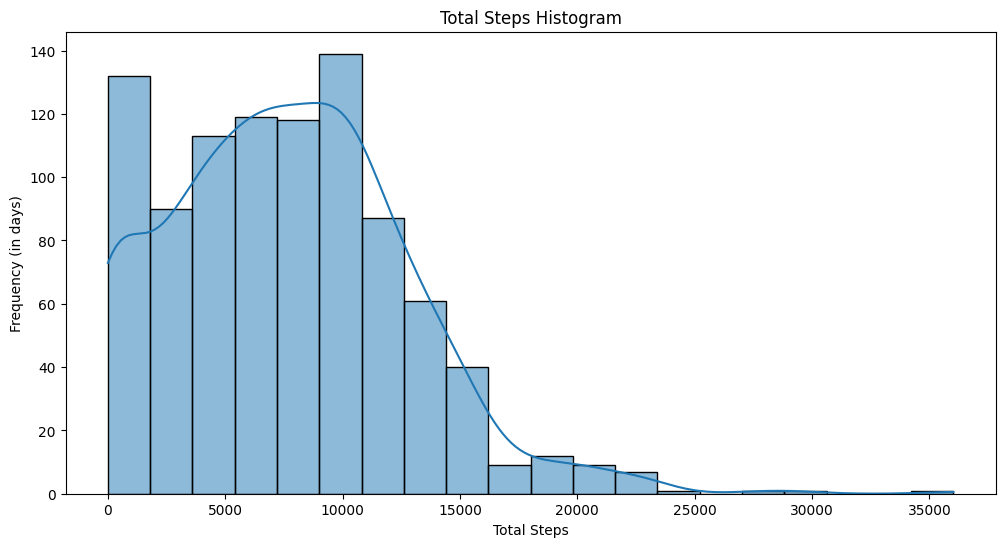

C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


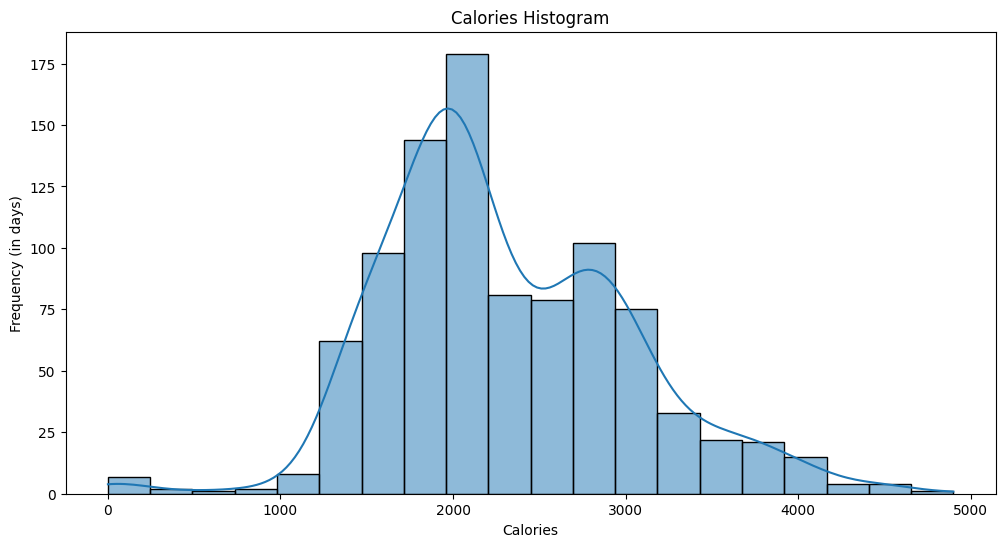

C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


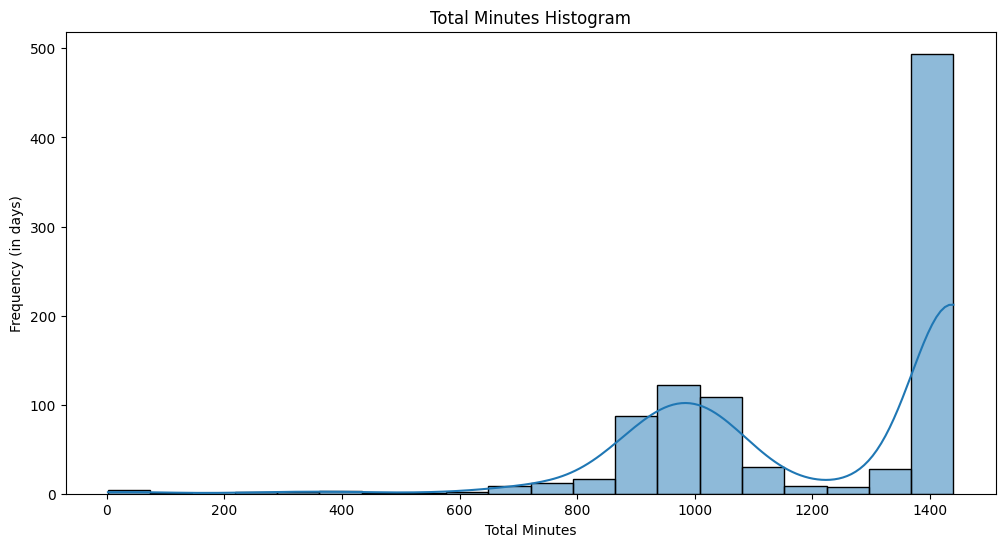

C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nihar\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


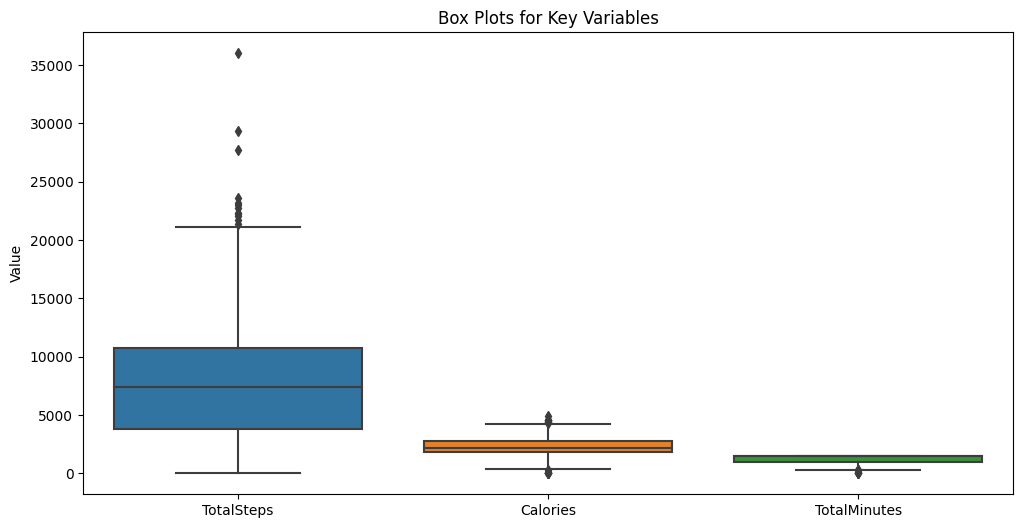

In [29]:
#Histogram for total steps
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalSteps'], kde=True, bins=20)
plt.title('Total Steps Histogram')
plt.xlabel('Total Steps')
plt.ylabel('Frequency (in days)')
plt.show()

#Histogram for Calories
plt.figure(figsize=(12, 6))
sns.histplot(data['Calories'], kde=True, bins=20)
plt.title('Calories Histogram')
plt.xlabel('Calories')
plt.ylabel('Frequency (in days)')
plt.show()

#Histogram for Total Minutes
plt.figure(figsize=(12, 6))
sns.histplot(data['TotalMinutes'], kde=True, bins=20)
plt.title('Total Minutes Histogram')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency (in days)')
plt.show()

#Box plots for key variables(total steps, calories, total minutes)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['TotalSteps', 'Calories', 'TotalMinutes']])
plt.title('Box Plots for Key Variables')
plt.ylabel('Value')
plt.xticks()
plt.show()


Step 2: Time Series Analysis

Purpose:
This step focuses on exploring time-related patterns in the Fitbit data by creating time series plots and calculating daily or weekly averages of variables like total steps.


#Convert the 'Date' column to a datetime object

In [9]:
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

#Calculate daily averages of the selected variable


In [10]:
daily_avg = data.resample('D', on='ActivityDate').mean()


#Create time series plots to visualize how metrics change over time

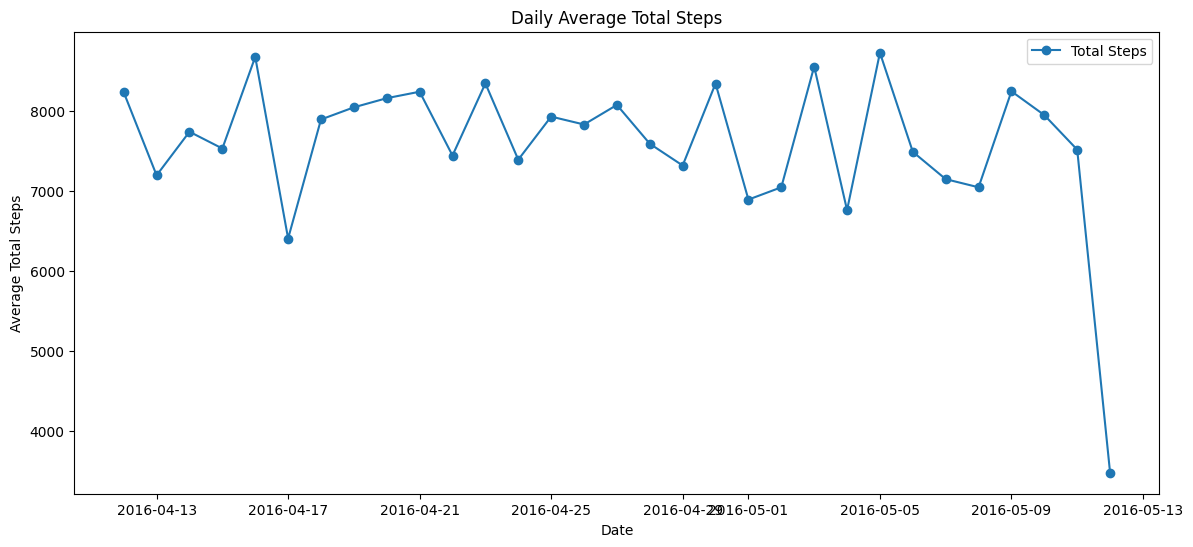

In [11]:
plt.figure(figsize=(14,6))
#visualize the time series plot with the help of line plot
plt.plot(daily_avg.index, daily_avg['TotalSteps'], label='Total Steps', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Total Steps')
plt.title('Daily Average Total Steps')
# shows the legend for total steps
plt.legend()
plt.show()

Step 3: Correlation and Regression Analysis

Purpose:
In this step, we perform correlation analysis to identify relationships between variables and conduct simple linear regression to predict one variable based on another.

#Calculate correlation matrix to identify relationships between variables

In [12]:
correlation_matrix = data[['TotalSteps', 'Calories', 'TotalMinutes']].corr()

 #Perform simple linear regression to predict 'CaloriesBurned' based on 'TotalMinutes' 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data['TotalMinutes'].values.reshape(-1, 1)
y = data['Calories']

# split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# fit the model
model.fit(X_train, y_train)


LinearRegression()

Visualize regression results

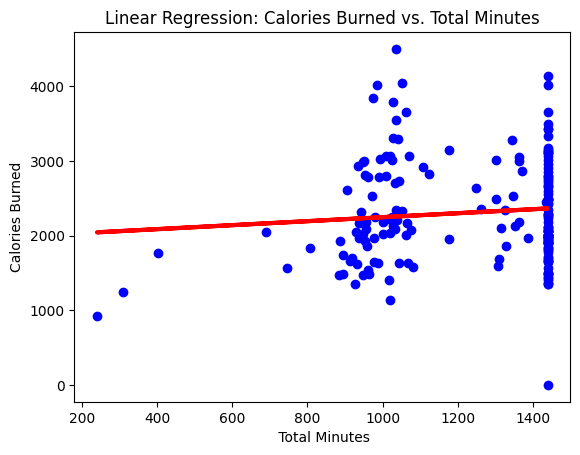

In [14]:
#visualize the scatter plot
plt.scatter(X_test, y_test, color='blue')
#visualize the line plot
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3)
plt.title('Linear Regression: Calories Burned vs. Total Minutes')
plt.xlabel(' Total Minutes')
plt.ylabel('Calories Burned')
plt.show()

Step 4: Polynomial Regression for Total Steps vs. Calories

Purpose:
This step involves conducting polynomial regression analysis to model the relationship between the total steps and calories burned, exploring potential non-linear relationships.

#Polynomial Regression: We fit polynomial regression models of different degrees (e.g., quadratic, cubic) to capture non-linear relationships


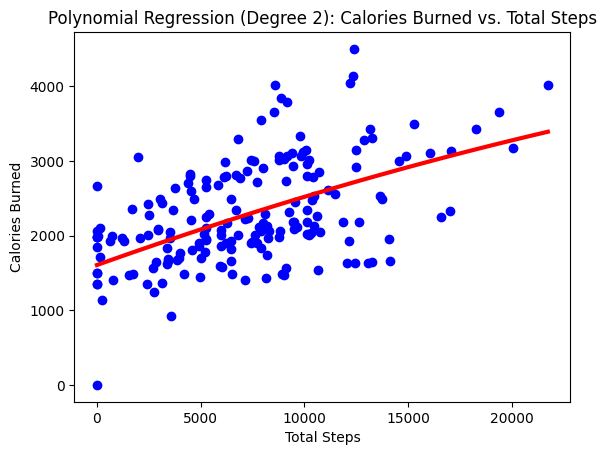

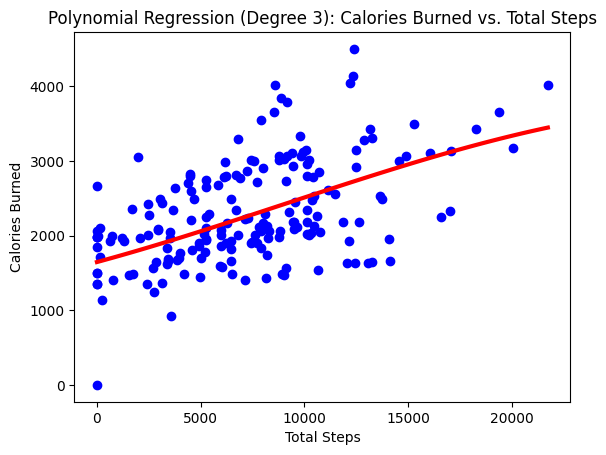

In [15]:
# importing libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = data['TotalSteps'].values.reshape(-1,1)
y = data['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit polynomial regression models
degrees = [2, 3]  # You can try different degrees
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)

    # Visualize polynomial regression curves
    X_range = np.linspace(min(X_test), max(X_test), 100).reshape(-1, 1)
    y_pred = model.predict(X_range)

    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_range, y_pred, color='red', linewidth=3)
    plt.title(f'Polynomial Regression (Degree {degree}): Calories Burned vs. Total Steps')
    plt.xlabel('Total Steps')
    plt.ylabel('Calories Burned')
    plt.show()


 Evaluate goodness of fit:  evaluate the goodness of fit using metrics like R-squared and Mean Squared Error (MSE).

In [21]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Degree {degree} - R-squared: {r2:.2f}, MSE: {mse:.2f}')

Degree 3 - R-squared: 1.00, MSE: 0.00


Create a binary variable for activity classification indicating whether a day was "active" or "sedentary" based on a step threshold


In [17]:
data['ActivityClass'] = (data['TotalSteps'] >= 10000).astype(int)

Perform logistic regression model for activity classification

In [18]:
#import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X = data[['TotalSteps', 'TotalMinutes']].values
y = data['ActivityClass']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

 Predict and evaluate the model's accuracy, precision, recall, and F1-score.

In [19]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


Visualize the logistic regression decision boundary 

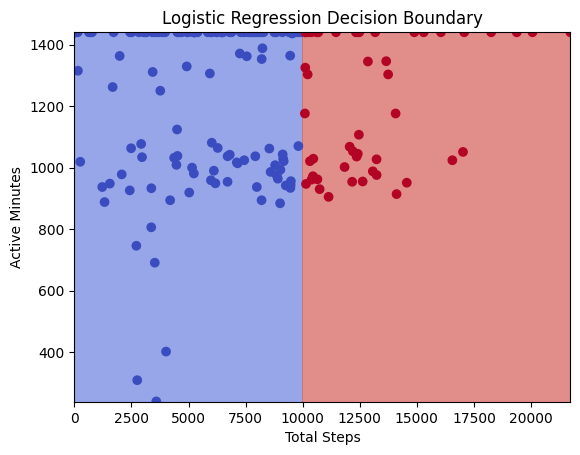

In [20]:
#  Generate a grid of points to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.5))

# Predict the class for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='o')
plt.xlabel('Total Steps')
plt.ylabel('Active Minutes')
plt.title('Logistic Regression Decision Boundary')
plt.show()